In [3]:
library(randomForest)

data_ = read.csv("Credit.csv", stringsAsFactors=T)
dim(data_)
head(data_)
summary(data_)

[1] 1000   21

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


      checking_status    duration                             credit_history
 'no checking':394    Min.   : 4.0   'all paid'                      : 49   
 <0           :274    1st Qu.:12.0   'critical/other existing credit':293   
 >=200        : 63    Median :18.0   'delayed previously'            : 88   
 0<=X<200     :269    Mean   :20.9   'existing paid'                 :530   
                      3rd Qu.:24.0   'no credits/all paid'           : 40   
                      Max.   :72.0                                          
                                                                            
                purpose    credit_amount              savings_status
 radio/tv           :280   Min.   :  250   'no known savings':183   
 'new car'          :234   1st Qu.: 1366   <100              :603   
 furniture/equipment:181   Median : 2320   >=1000            : 48   
 'used car'         :103   Mean   : 3271   100<=X<500        :103   
 business           : 97   3rd Qu.: 397

## Amostras

In [4]:
amostra = sample(2, 1000, replace = T, prob = c(0.7, 0.3))
datatreino = data_[amostra==1, ]
datateste = data_[amostra==2, ]

dim(datatreino)
dim(datateste)

[1] 677  21

[1] 323  21

## Modelo Linear
- randomForest( ) -> Gera várias árvores de seleção independentes e seleciona a melhor para o modelo.
- ntree= -> Quantidade minima de árvores de seleção
- importance= -> Utiliza atributos mais relevantes e importantes


Call:
 randomForest(formula = class ~ ., data = datatreino, ntree = 100,      importance = T) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 4

        OOB estimate of  error rate: 26%
Confusion matrix:
     bad good class.error
bad   77  129  0.62621359
good  47  424  0.09978769

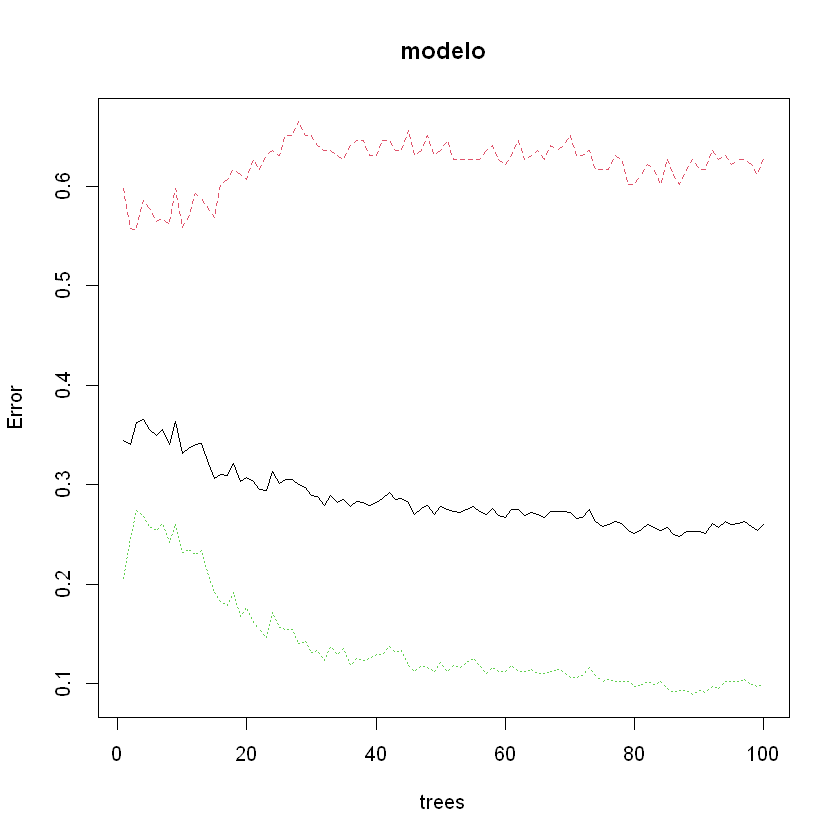

In [5]:
modelo = randomForest(class ~ ., data=datatreino, ntree=100, importance=T)
modelo
plot(modelo)

## Previsão e Matriz de Confusão

In [7]:
predicao = predict(modelo, newdata = datateste)
summary(predicao)

confusao = table(predicao, datateste$class)
confusao

bad good 
  57  266

        
predicao bad good
    bad   40   17
    good  54  212

## Avaliando Performance

In [9]:
taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaerro = (confusao[2] + confusao[3]) / sum(confusao)

taxaacerto
taxaerro

[1] 0.7801858

[1] 0.2198142